In [52]:
from pandas import read_csv
from pandas import datetime
from pandas import date_range
from pandas import to_datetime
from matplotlib import pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
import pandas as pd
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from math import sqrt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-notebook')

In [2]:
dframe = read_csv('finance_data.csv', header=None)
dframe.columns=['stream']
dframe.index=to_datetime(date_range("25/11/2017", periods=dframe.shape[0], freq='1s'))
dframe.dtypes

stream    float64
dtype: object

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    fig = plt.figure(figsize=(20, 12)) 
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [3]:
dframe.head()

,stream
2017-11-25 00:00:00,1.24440
2017-11-25 00:00:01,1.24440
2017-11-25 00:00:02,1.24440
2017-11-25 00:00:03,1.24440
2017-11-25 00:00:04,1.24435


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C841FEE2B0>]], dtype=object)

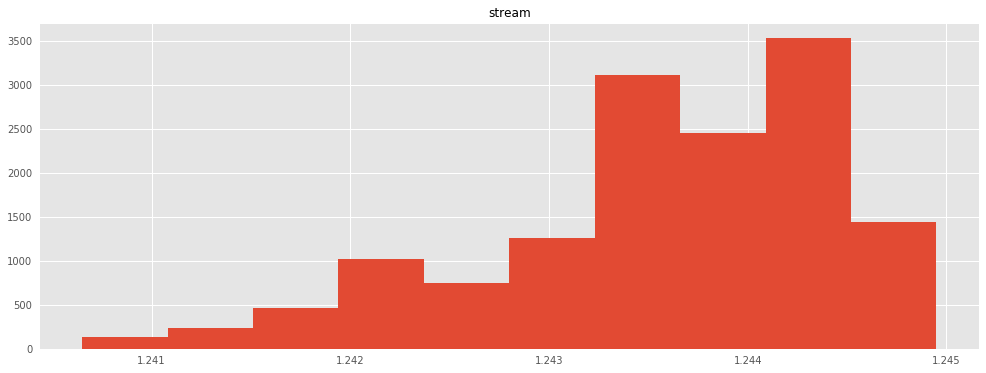

In [53]:
dframe.hist(figsize=(15, 6))

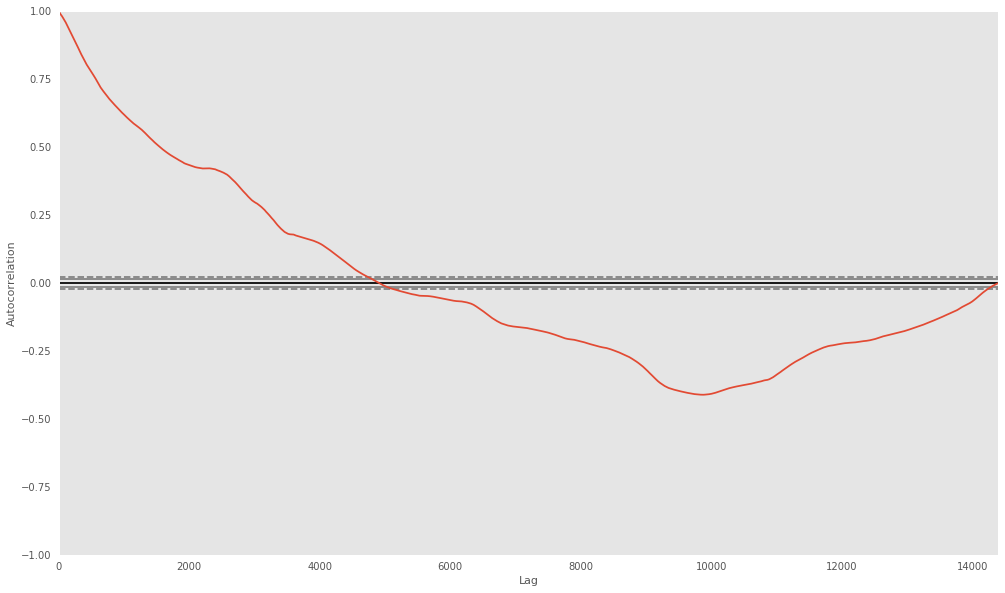

In [56]:
fig = plt.figure(figsize=(15, 10)) 
autocorrelation_plot(dframe)

In [61]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [82]:
mod = sm.tsa.statespace.SARIMAX(dframe.stream,
                                order=(2,1,2),
                                seasonal_order=(0,0,0,0),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1887   8.15e-21   1.46e+20      0.000       1.189       1.189
ar.L2         -0.3688   1.54e-20  -2.39e+19      0.000      -0.369      -0.369
ma.L1         -1.3052      5e-21  -2.61e+20      0.000      -1.305      -1.305
ma.L2          0.4737   1.91e-20   2.49e+19      0.000       0.474       0.474
sigma2      4.911e-10   1.56e-11     31.558      0.000    4.61e-10    5.22e-10


In [83]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                 stream   No. Observations:                14400
Model:               SARIMAX(2, 1, 2)   Log Likelihood              133869.192
Date:                Sun, 26 Nov 2017   AIC                        -267728.384
Time:                        13:32:13   BIC                        -267690.509
Sample:                    11-25-2017   HQIC                       -267715.792
                         - 11-25-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1887   8.15e-21   1.46e+20      0.000       1.189       1.189
ar.L2         -0.3688   1.54e-20  -2.39e+19      0.000      -0.369      -0.369
ma.L1         -1.3052      5e-21  -2.61e+20      0.0

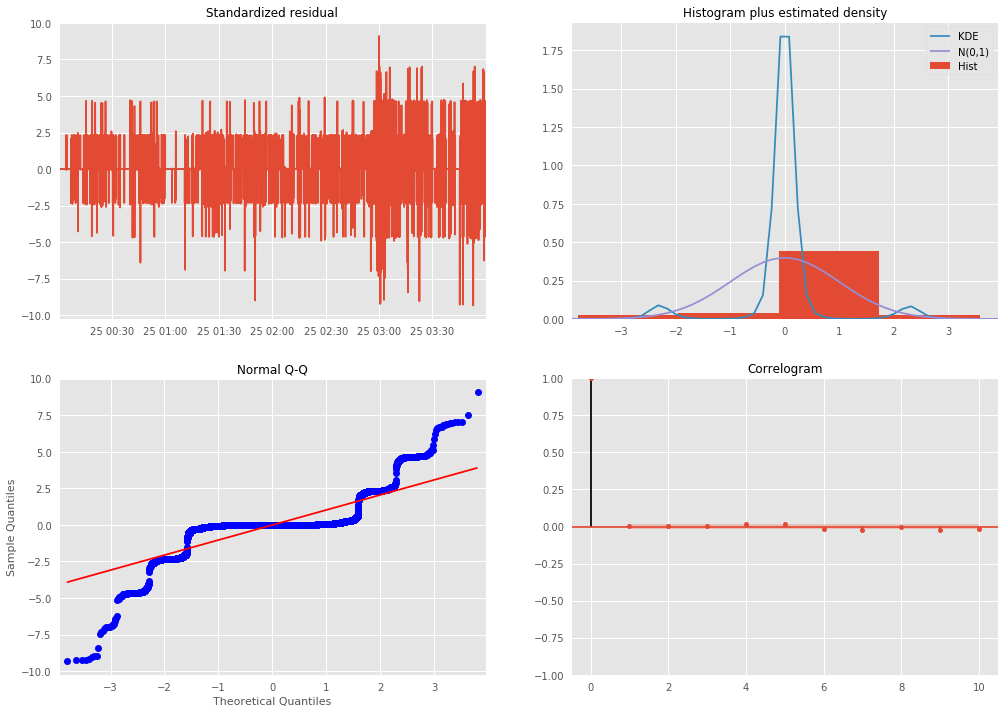

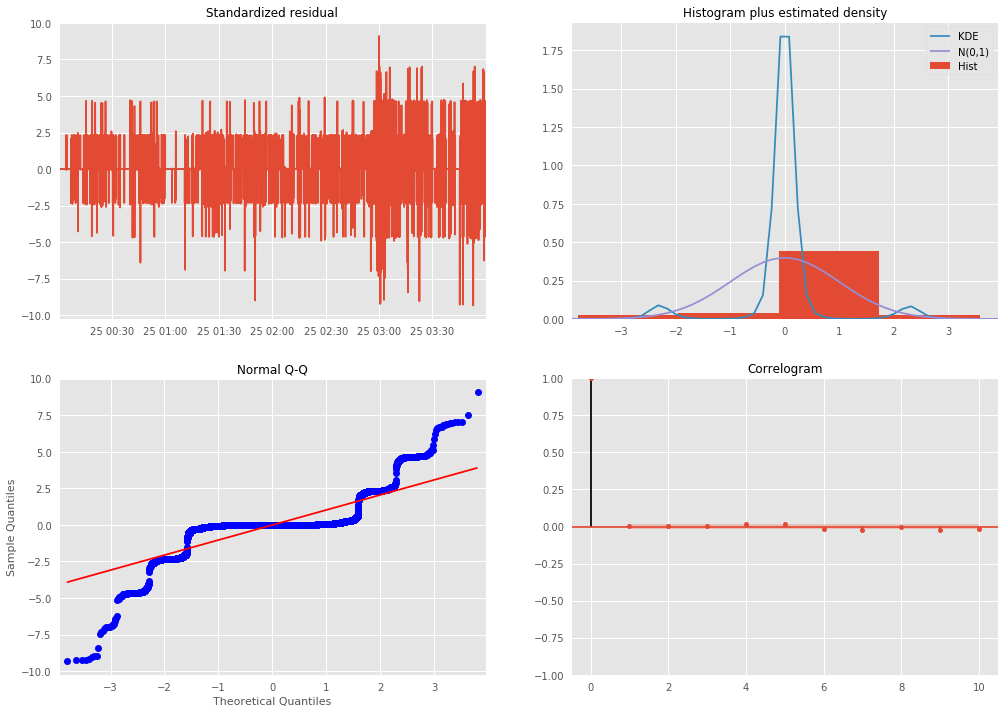

In [84]:
results.plot_diagnostics(figsize=(15, 12))

In [100]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=3600)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
pred_ci

,lower stream,upper stream
2017-11-25 04:00:00,1.241806,1.241891
2017-11-25 04:00:01,1.241791,1.241905
2017-11-25 04:00:02,1.241780,1.241917
2017-11-25 04:00:03,1.241771,1.241926
2017-11-25 04:00:04,1.241763,1.241936
2017-11-25 04:00:05,1.241755,1.241944
2017-11-25 04:00:06,1.241748,1.241952
2017-11-25 04:00:07,1.241740,1.241960
2017-11-25 04:00:08,1.241733,1.241967
2017-11-25 04:00:09,1.241727,1.241974


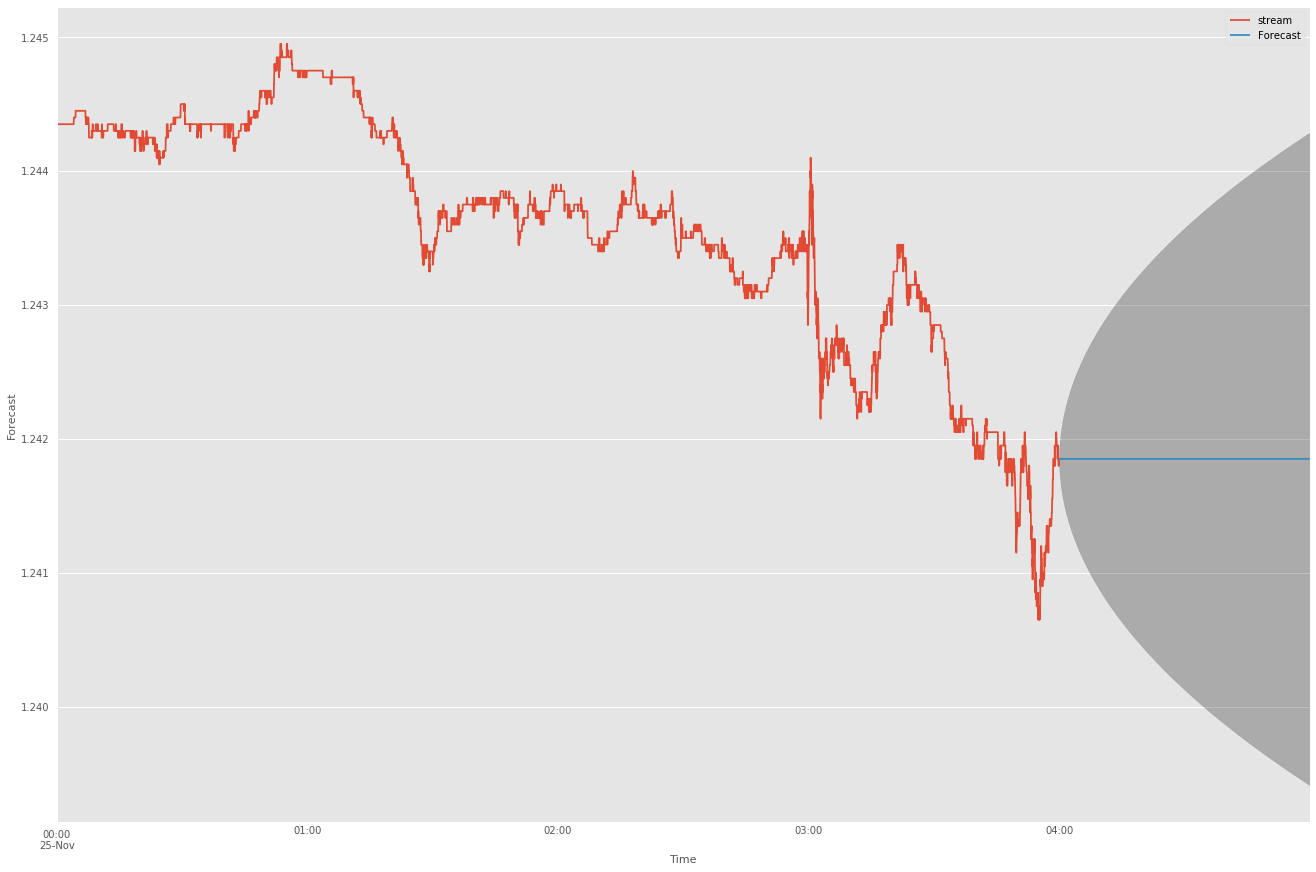

In [101]:
ax = dframe.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time')
ax.set_ylabel('Forecast')

plt.legend()
plt.show()